# Project: Laboratory Exam Results

### About
With this project I want to vizualize the results of some laboratory exams from my family. But to turn it publicly, I will anonymize the dataset records with this notebook.

- The source file contains data for a single patient across multiple exam types and years.
- The **goal** here is to automatically create additional synthetic patients and generate realistic exam histories while preserving the structure, distributions, and logic of the original dataset.
- The process uses pandas, and controlled randomization techniques to simulate plausible medical exam data.
- The **final output** will be a consolidated dataset with multiple patients, randomized results, and anonymized identifiers, exported in Excel format.


---

### 1. Load Data

In [131]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
file_path = "/home/rafael/code/lab_exams/blood_exam_results.xlsx"
df = pd.read_excel(file_path)

print("✅ File loaded!")
print("\nShape:", df.shape)
print("\nColumns:" , df.columns)

✅ File loaded!

Shape: (80, 9)

Columns: Index(['Patient Name', 'DOB', 'Date of Exam', 'Blood Test EN', 'Result',
       'Unit', 'Reference MIN', 'Reference MAX', 'Purpose EN'],
      dtype='object')


In [44]:
df.head()

,Patient Name,DOB,Date of Exam,Blood Test EN,Result,Unit,Reference MIN,Reference MAX,Purpose EN
0,Patient A,2000-03-18,2019-11-08,ALT (TGP),0.0,0,0.0,0.0,Liver enzyme that indicates inflammation or da...
1,Patient A,2000-03-18,2020-12-17,ALT (TGP),19.0,U/L,10.0,49.0,Liver enzyme that indicates inflammation or da...
2,Patient A,2000-03-18,2022-12-10,ALT (TGP),29.0,U/L,0.0,45.0,Liver enzyme that indicates inflammation or da...
3,Patient A,2000-03-18,2024-04-18,ALT (TGP),29.0,U/L,10.0,49.0,Liver enzyme that indicates inflammation or da...
4,Patient A,2000-03-18,2025-02-26,ALT (TGP),23.0,U/L,10.0,49.0,Liver enzyme that indicates inflammation or da...


---

### 2. Extending the Dataset

To extent the dataset from only 1 patient to more patients, let's use the mehotd **assign()**:
- It basically takes the existing df, do NOT modify it, and return a new dataframe where the column "Patient Name" has been fully replaced with "Patient B".

In [47]:
df.assign(**{"Patient Name": "Patient B",
              "DOB": "1980-03-08"})

,Patient Name,DOB,Date of Exam,Blood Test EN,Result,Unit,Reference MIN,Reference MAX,Purpose EN
0,Patient B,1980-03-08,2019-11-08,ALT (TGP),0.0,0,0.0,0.0,Liver enzyme that indicates inflammation or da...
1,Patient B,1980-03-08,2020-12-17,ALT (TGP),19.0,U/L,10.0,49.0,Liver enzyme that indicates inflammation or da...
2,Patient B,1980-03-08,2022-12-10,ALT (TGP),29.0,U/L,0.0,45.0,Liver enzyme that indicates inflammation or da...
3,Patient B,1980-03-08,2024-04-18,ALT (TGP),29.0,U/L,10.0,49.0,Liver enzyme that indicates inflammation or da...
4,Patient B,1980-03-08,2025-02-26,ALT (TGP),23.0,U/L,10.0,49.0,Liver enzyme that indicates inflammation or da...
...,...,...,...,...,...,...,...,...,...
75,Patient B,1980-03-08,2019-11-08,Vitamin D,NaN,NaN,20.0,80.0,"Measures vitamin D important for bones, immuni..."
76,Patient B,1980-03-08,2020-12-17,Vitamin D,38.0,ng/mL,20.0,80.0,"Measures vitamin D important for bones, immuni..."
77,Patient B,1980-03-08,2022-12-10,Vitamin D,27.0,ng/mL,20.0,80.0,"Measures vitamin D important for bones, immuni..."
78,Patient B,1980-03-08,2024-04-18,Vitamin D,38.3,ng/mL,20.0,80.0,"Measures vitamin D important for bones, immuni..."


In [49]:
#Testing if our DF keeps the same:
df.head()

,Patient Name,DOB,Date of Exam,Blood Test EN,Result,Unit,Reference MIN,Reference MAX,Purpose EN
0,Patient A,2000-03-18,2019-11-08,ALT (TGP),0.0,0,0.0,0.0,Liver enzyme that indicates inflammation or da...
1,Patient A,2000-03-18,2020-12-17,ALT (TGP),19.0,U/L,10.0,49.0,Liver enzyme that indicates inflammation or da...
2,Patient A,2000-03-18,2022-12-10,ALT (TGP),29.0,U/L,0.0,45.0,Liver enzyme that indicates inflammation or da...
3,Patient A,2000-03-18,2024-04-18,ALT (TGP),29.0,U/L,10.0,49.0,Liver enzyme that indicates inflammation or da...
4,Patient A,2000-03-18,2025-02-26,ALT (TGP),23.0,U/L,10.0,49.0,Liver enzyme that indicates inflammation or da...


In [50]:
# Let's combine them all:
df_A = df.copy()

df_B = df.assign(**{"Patient Name": "Patient B","DOB": "1999-03-08"})

df_C = df.assign(**{"Patient Name": "Patient C","DOB": "1967-10-24"})

df_D = df.assign(**{"Patient Name": "Patient D","DOB": "1970-02-12"})

df_all = pd.concat( [df_A, df_B, df_C, df_D], ignore_index = True)

In [55]:
df_all["Patient Name"].tail()

315    Patient D
316    Patient D
317    Patient D
318    Patient D
319    Patient D
Name: Patient Name, dtype: object

In [57]:
df_all[["Patient Name", "DOB"]].drop_duplicates()

,Patient Name,DOB
0,Patient A,2000-03-18 00:00:00
80,Patient B,1999-03-08
160,Patient C,1967-10-24
240,Patient D,1970-02-12


In [67]:
# Let's standardite the DOB for all patients, as we can see above that they have different formats:
df_all["DOB"] = pd.to_datetime(df_all["DOB"], errors="coerce")
df_all["DOB"].describe

<bound method NDFrame.describe of 0     2000-03-18
1     2000-03-18
2     2000-03-18
3     2000-03-18
4     2000-03-18
         ...    
315   1970-02-12
316   1970-02-12
317   1970-02-12
318   1970-02-12
319   1970-02-12
Name: DOB, Length: 320, dtype: datetime64[ns]>

In [68]:
df_all[["Patient Name", "DOB"]].drop_duplicates()

,Patient Name,DOB
0,Patient A,2000-03-18
80,Patient B,1999-03-08
160,Patient C,1967-10-24
240,Patient D,1970-02-12


---

### 3. Randomizing the Results

- Here we'll keep Patient A’s results untouched.
- For all other patients, we generate a random value for 'Results': between Reference MIN and Reference MAX

In [69]:
# First we copy the original DF to avoid modifying it accidentally
df_random = df_all.copy()

In [ ]:
#Exclude non-A patients (it transforms the DF in Boolen)
mask = df_random["Patient Name"] != "Patient A"

mask

0      False
1      False
2      False
3      False
4      False
       ...  
315     True
316     True
317     True
318     True
319     True
Name: Patient Name, Length: 320, dtype: bool

In [79]:
# Randomize results only for these patients using the np.random.uniform()

min_vals  = df_random.loc[mask, "Reference MIN"]
max_vals  = df_random.loc[mask, "Reference MAX"]

df_random.loc[mask, "Result"] = np.random.uniform( low = min_vals,  high = max_vals )

In [80]:
# Let's round it:
df_random["Result"] = df_random["Result"].round(2)

In [86]:
df_random[df_random["Patient Name"] == "Patient B"].head()

,Patient Name,DOB,Date of Exam,Blood Test EN,Result,Unit,Reference MIN,Reference MAX,Purpose EN,Patient B
80,Patient B,1999-03-08,2019-11-08,ALT (TGP),0.00,0,0.0,0.0,Liver enzyme that indicates inflammation or da...,Patient B
81,Patient B,1999-03-08,2020-12-17,ALT (TGP),32.31,U/L,10.0,49.0,Liver enzyme that indicates inflammation or da...,Patient B
82,Patient B,1999-03-08,2022-12-10,ALT (TGP),25.70,U/L,0.0,45.0,Liver enzyme that indicates inflammation or da...,Patient B
83,Patient B,1999-03-08,2024-04-18,ALT (TGP),13.21,U/L,10.0,49.0,Liver enzyme that indicates inflammation or da...,Patient B
84,Patient B,1999-03-08,2025-02-26,ALT (TGP),35.97,U/L,10.0,49.0,Liver enzyme that indicates inflammation or da...,Patient B


Randomizing the **Data of Exam** too:

In [89]:
df_B_exams = df_random[df_random["Patient Name"] == "Patient B"][["Blood Test EN", "Date of Exam"]]
df_B_exams

,Blood Test EN,Date of Exam
80,ALT (TGP),2019-11-08
81,ALT (TGP),2020-12-17
82,ALT (TGP),2022-12-10
83,ALT (TGP),2024-04-18
84,ALT (TGP),2025-02-26
...,...,...
155,Vitamin D,2019-11-08
156,Vitamin D,2020-12-17
157,Vitamin D,2022-12-10
158,Vitamin D,2024-04-18


**2020-12-17**

In [ ]:
# Let's do it quicker, without using random, but a specific date:
df_rand2 = df_random.copy()

# Patient B: replace 2020-12-17 → 2019-03-19
df_random.loc[ (df_rand2["Patient Name"] == "Patient B") & (df_rand2["Date of Exam"] == "2020-12-17"),
                "Date of Exam"] = "2019-03-19"

# Patient C: replace 2020-12-17 → 2019-05-11
df_rand2.loc[   (df_rand2["Patient Name"] == "Patient C") & (df_rand2["Date of Exam"] == "2020-12-17"),
                "Date of Exam"] = "2019-05-11"

# Patient D: replace 2020-12-17 → 2020-08-22
df_rand2.loc[    (df_rand2["Patient Name"] == "Patient D") & (df_rand2["Date of Exam"] == "2020-12-17"),
                "Date of Exam"] = "2020-08-22"

**2022-12-10**

In [95]:
# Patient B: replace 2022-12-10 → 2021-03-17
df_random.loc[ (df_rand2["Patient Name"] == "Patient B") & (df_rand2["Date of Exam"] ==  "2022-12-10"),
                "Date of Exam"] = "2021-03-17"

# Patient C: replace 2022-12-10 → 2021-03-17
df_rand2.loc[   (df_rand2["Patient Name"] == "Patient C") & (df_rand2["Date of Exam"] ==  "2022-12-10"),
                "Date of Exam"] = "2021-03-17"

# Patient D: replace 2022-12-10 → 2022-10-10
df_rand2.loc[    (df_rand2["Patient Name"] == "Patient D") & (df_rand2["Date of Exam"] == "2022-12-10"),
                "Date of Exam"] = "2022-10-10"

**2024-04-18**

In [96]:
# Patient B: replace 2024-04-18 → 2023-02-19
df_random.loc[ (df_rand2["Patient Name"] == "Patient B") & (df_rand2["Date of Exam"] == "2024-04-18"),
                "Date of Exam"] = "2023-02-19"

# Patient C: replace 2024-04-18 → 2024-06-11
df_rand2.loc[   (df_rand2["Patient Name"] == "Patient C") & (df_rand2["Date of Exam"] == "2024-04-18"),
                "Date of Exam"] = "2024-06-11"

# Patient D: replace 2024-04-18 → 2024-08-22
df_rand2.loc[    (df_rand2["Patient Name"] == "Patient D") & (df_rand2["Date of Exam"] == "2024-04-18"),
                "Date of Exam"] = "2024-08-22"

**2025-02-26**

In [107]:
# Patient B: replace 2025-02-26 → 2025-01-15
df_random.loc[ (df_rand2["Patient Name"] == "Patient B") & (df_rand2["Date of Exam"] == "2025-02-26"),
                "Date of Exam"] = "2025-01-15"

# Patient C: replace 2025-02-26 → 2025-01-15
df_rand2.loc[   (df_rand2["Patient Name"] == "Patient C") & (df_rand2["Date of Exam"] == "2025-02-26"),
                "Date of Exam"] = "2025-01-15"

# Patient D: replace 2025-02-26 → 2025-01-15
df_rand2.loc[    (df_rand2["Patient Name"] == "Patient D") & (df_rand2["Date of Exam"] == "2025-02-26"),
                "Date of Exam"] = "2025-01-15"

In [108]:
# Testing if it worked:
df_rand2[df_random["Patient Name"] == "Patient A"][["Date of Exam"]].drop_duplicates()

,Date of Exam
0,2019-11-08
1,2020-12-17
2,2022-12-10
3,2024-04-18
4,2025-02-26


In [109]:
df_rand2[df_random["Patient Name"] == "Patient D"][["Date of Exam"]].drop_duplicates()

,Date of Exam
240,2019-11-08
241,2020-08-22
242,2022-10-10
243,2024-08-22
244,2025-01-15


**2019-11-08**

In [116]:
# Patient B: replace 2019-11-08 → 2017-03-17
df_random.loc[ (df_rand2["Patient Name"] == "Patient B") & (df_rand2["Date of Exam"] ==  "2019-11-08"),
                "Date of Exam"] = "2017-03-17"

# Patient C: replace 2019-11-08 → 2017-03-17
df_rand2.loc[   (df_rand2["Patient Name"] == "Patient C") & (df_rand2["Date of Exam"] ==  "2019-11-08"),
                "Date of Exam"] = "2017-03-17"

# Patient D: replace 2020-01-10 → 2018-01-15
df_rand2.loc[    (df_rand2["Patient Name"] == "Patient D") & (df_rand2["Date of Exam"] == "2020-01-10"),
                "Date of Exam"] = "2018-01-15"

In [118]:
# Testing again:
df_rand2[df_random["Patient Name"] == "Patient B"][["Date of Exam"]].drop_duplicates()

,Date of Exam
80,2017-01-19
81,2020-12-17
82,2022-12-10
83,2024-04-18
84,2025-02-26
85,2017-05-21
90,2017-12-06
95,2017-04-22
100,2017-02-25
105,2017-03-11


In [119]:
# Let's fix this year 2017 (with several dates) for Patient B and C:
mask_2017 = ( (df_rand2["Date of Exam"].dt.year == 2017) &
              (df_rand2["Patient Name"].isin(["Patient B", "Patient C"]))     )

df_rand2.loc[mask_2017, "Date of Exam"] = pd.to_datetime("2018-05-15")

In [126]:
# Testing again:
df_rand2[df_random["Patient Name"] == "Patient C"][["Date of Exam"]].drop_duplicates()

,Date of Exam
160,2018-05-15
161,2019-05-11
162,2023-03-17
163,2024-06-11
164,2025-01-15


---

### 4. Export Final Dataset

In [129]:
df_rand2.head()

,Patient Name,DOB,Date of Exam,Blood Test EN,Result,Unit,Reference MIN,Reference MAX,Purpose EN,Patient B
0,Patient A,2000-03-18,2019-11-08,ALT (TGP),0.0,0,0.0,0.0,Liver enzyme that indicates inflammation or da...,Patient B
1,Patient A,2000-03-18,2020-12-17,ALT (TGP),19.0,U/L,10.0,49.0,Liver enzyme that indicates inflammation or da...,Patient B
2,Patient A,2000-03-18,2022-12-10,ALT (TGP),29.0,U/L,0.0,45.0,Liver enzyme that indicates inflammation or da...,Patient B
3,Patient A,2000-03-18,2024-04-18,ALT (TGP),29.0,U/L,10.0,49.0,Liver enzyme that indicates inflammation or da...,Patient B
4,Patient A,2000-03-18,2025-02-26,ALT (TGP),23.0,U/L,10.0,49.0,Liver enzyme that indicates inflammation or da...,Patient B


In [130]:
# Export to Excel
df_rand2.to_excel("blood_exam_results_output.xlsx", sheet_name="data", index=False)

---

### 5. EXTRA - Visualizing 

Plotting some results

### Function to plot the Results:

In [ ]:
def plot_result(exam_name, df=df_rand2):
    """
    Plot the results of a specific exam for all patients over time.
    """

    # Filter for the specific exam
    df_exam = df[df["Blood Test EN"] == exam_name].copy()

    if df_exam.empty:
        print(f"No data found for exam: {exam_name}")
        return

    # Ensure Date of Exam is datetime
    df_exam["Date of Exam"] = pd.to_datetime(df_exam["Date of Exam"])

    # Create the line plot
    plt.figure(figsize=(10, 6))

    sns.lineplot(
        data=df_exam,
        x="Date of Exam",
        y="Result",
        hue="Patient Name",
        marker="o"
    )

    # Customize plot
    plt.title(f"{exam_name} Results Over Time")
    plt.xlabel("Date of Exam")
    plt.ylabel("Result")
    plt.xticks(rotation=45)
    plt.legend(title="Patient")
    plt.tight_layout()
    plt.show();

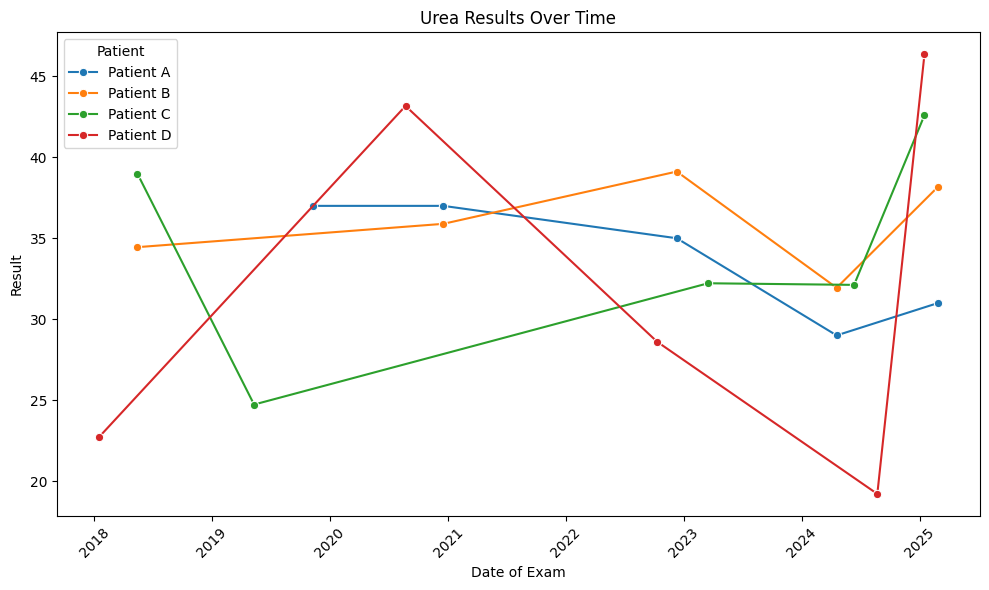

In [149]:
plot_result("Urea")

In [150]:
plot_result("Acid Uric")

No data found for exam: Acid Uric


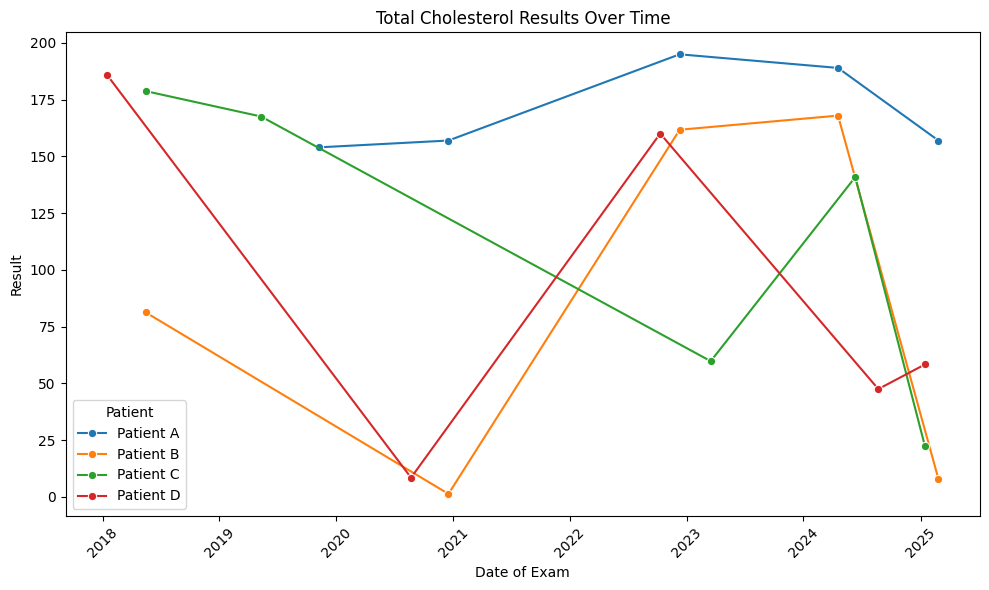

In [151]:
plot_result("Total Cholesterol")